损失数据已成功加载。


Failed to find a Ghostscript installation.  Distillation step skipped.


验证损失图已保存到 D:/PycharmProjects/保存的参数/指纹参数/Fig8b.eps


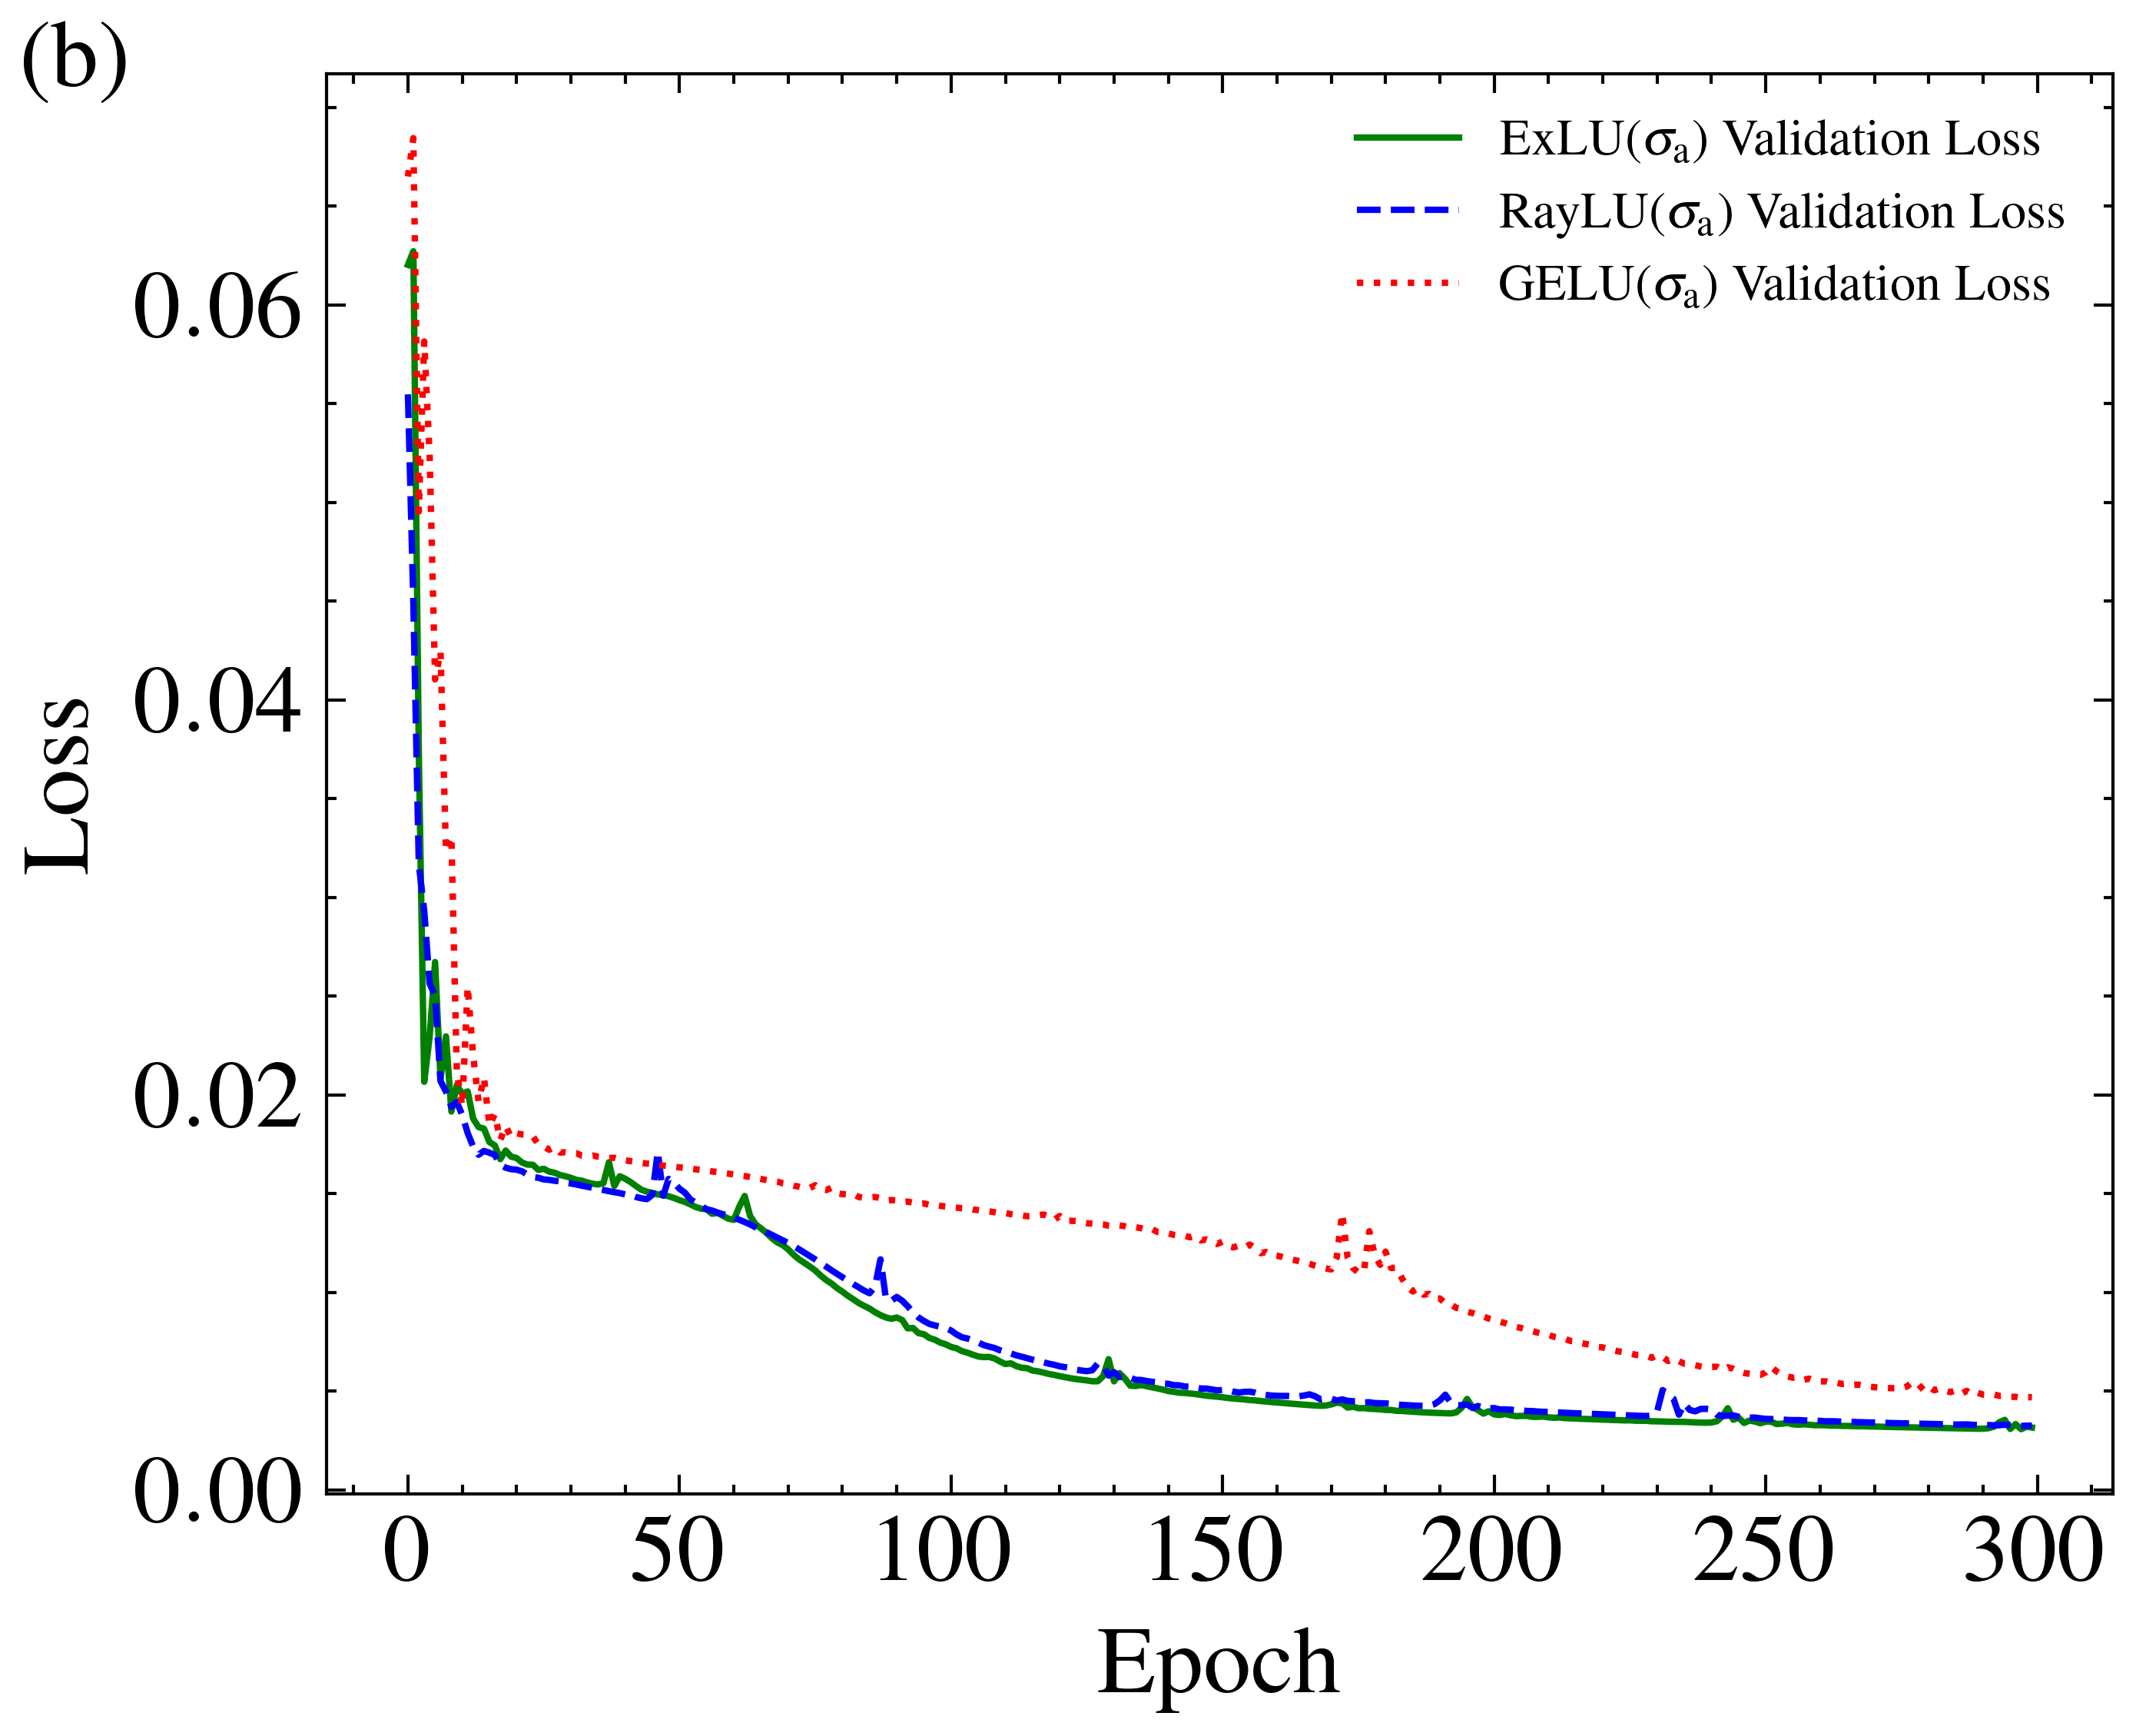

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

def load_loss_data(file_path):
    """加载指定路径的损失数据"""
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# 指定每种激活函数的损失数据路径
loss_files = {
    "ExLU($\sigma_{\mathrm{a}}$)": r"D:/PycharmProjects/保存的参数/指纹参数/loss_data(exlu).pkl",
    "RayLU($\sigma_{\mathrm{a}}$)": r"D:/PycharmProjects/保存的参数/指纹参数/loss_data(raylu).pkl",
    "GELU($\sigma_{\mathrm{a}}$)": r"D:/PycharmProjects/保存的参数/指纹参数/loss_data(gelu).pkl"
}

# 加载损失数据
loss_data = {name: load_loss_data(path) for name, path in loss_files.items()}
print("损失数据已成功加载。")

# 图形设置
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = True
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = True

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(5, 4))
plt.cla()  # 清除现有内容
plt.tick_params(labelsize=15)  # 设置刻度字体大小

# 不同线型和颜色的设置
linestyles = ['-', '--', ':']  # 实线, 虚线, 点线
colors = ['green', 'blue', 'red']  # 颜色列表

# 绘制每个激活函数的验证损失曲线
for i, (name, data) in enumerate(loss_data.items()):
    valid_loss = data['valid_loss']
    ax.plot(np.arange(len(valid_loss)), valid_loss, 
            color=colors[i], linestyle=linestyles[i],
            label=f'{name} Validation Loss', linewidth=1)

# 设置轴标签
ax.set_xlabel(r'$\mathrm{Epoch}$', fontsize=15)
ax.set_ylabel(r'$\mathrm{Loss}$', fontsize=15)

# 设置x轴刻度
plt.xticks(np.arange(0, max(len(data['valid_loss']) for data in loss_data.values()) + 5, step=50))

# 添加 (b) 标签
ax.text(-0.17, 0.99, '(b)', transform=ax.transAxes, 
        fontdict={'size': 15, 'color': 'black'})

# 添加图例
plt.legend(fontsize=8, loc='upper right')

# 保存路径和文件名
plot_path = r'D:/PycharmProjects/保存的参数/指纹参数/Fig8b.eps'

# 保存为 EPS 文件
plt.savefig(plot_path, format='eps', bbox_inches='tight')
print(f"验证损失图已保存到 {plot_path}")

# 展示图形
plt.show()
